## Project 2 Group Members

    Mukesh Reddy Mavurapu      2251153
    Jaswanthi Boyapati         2250742
    Pradeep Reddy Mallepally   2200020

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
import warnings
warnings.filterwarnings("ignore")
#Eucludiean distance
from scipy.spatial.distance import pdist, squareform

In [2]:
data = pd.read_csv("dailykos.csv")

In [3]:
data

,abandon,abc,ability,abortion,absolute,abstain,abu,abuse,accept,access,...,yeah,year,yesterday,york,youll,young,youre,youve,zogby,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3425,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3426,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3427,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3428,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Each of the variables in the dataset is a word that has appeared in at least 50 different articles (1,545 words in total). The set of words has been trimmed according to some of the techniques covered in the previous weeks (punctuation has been removed, and stop words have been removed). For each document, the variable values are the number of times that a word appeared in the document. 

There are a total of 3430 documents and 1545 words are taken which are appeared in 50 different articles. We have done data preprocessing if there is any null value or Nan values which we are replacing with 0. 

### Data Preprocessing

In [4]:
missing_values= data.isnull().sum()
percentage_missing = (missing_values / len(data)) * 100

In [5]:
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': percentage_missing})
print(missing_values)
print(missing_info)

abandon     0
abc         0
ability     0
abortion    0
absolute    0
           ..
young       0
youre       0
youve       0
zogby       0
zone        0
Length: 1545, dtype: int64
          Missing Values  Percentage
abandon                0         0.0
abc                    0         0.0
ability                0         0.0
abortion               0         0.0
absolute               0         0.0
...                  ...         ...
young                  0         0.0
youre                  0         0.0
youve                  0         0.0
zogby                  0         0.0
zone                   0         0.0

[1545 rows x 2 columns]


In [6]:
data_filled = data.fillna(0)
print(data.isnull().sum())

abandon     0
abc         0
ability     0
abortion    0
absolute    0
           ..
young       0
youre       0
youve       0
zogby       0
zone        0
Length: 1545, dtype: int64


## 1. Compute the Euclidian distances.

In [7]:
euclidean_distances = squareform(pdist(data_filled))

print(euclidean_distances)

[[ 0.         15.71623365 21.23676058 ... 16.0623784  15.74801575
  17.88854382]
 [15.71623365  0.         20.63976744 ... 14.59451952 13.67479433
  16.52271164]
 [21.23676058 20.63976744  0.         ... 19.92485885 19.46792233
  21.51743479]
 ...
 [16.0623784  14.59451952 19.92485885 ...  0.          9.48683298
  14.        ]
 [15.74801575 13.67479433 19.46792233 ...  9.48683298  0.
  10.95445115]
 [17.88854382 16.52271164 21.51743479 ... 14.         10.95445115
   0.        ]]


#### Creating the distances will probably take you a while. Why? Explain.

Calculating Euclidean distances in high-dimensional datasets is computationally intensive due to the large number of dimensions (1,545 words) and data points (3,430 articles). Each pairwise comparison requires numerous mathematical operations, resulting in a quadratic increase in computations. This complexity, coupled with hardware limitations, makes the process time-consuming. Mitigation strategies include dimensionality reduction and the use of optimized libraries and parallel processing to improve efficiency. Ward's hierarchical clustering method can also reduce calculations by utilizing a linkage approach, especially useful for large datasets.

## Hierarchical clustering

In [7]:
# Hierarchical clustering model 
from scipy.cluster.hierarchy import linkage, fcluster,dendrogram

tree_matrix = linkage(data_filled, method="ward", metric="euclidean")

## Dendrogram plot

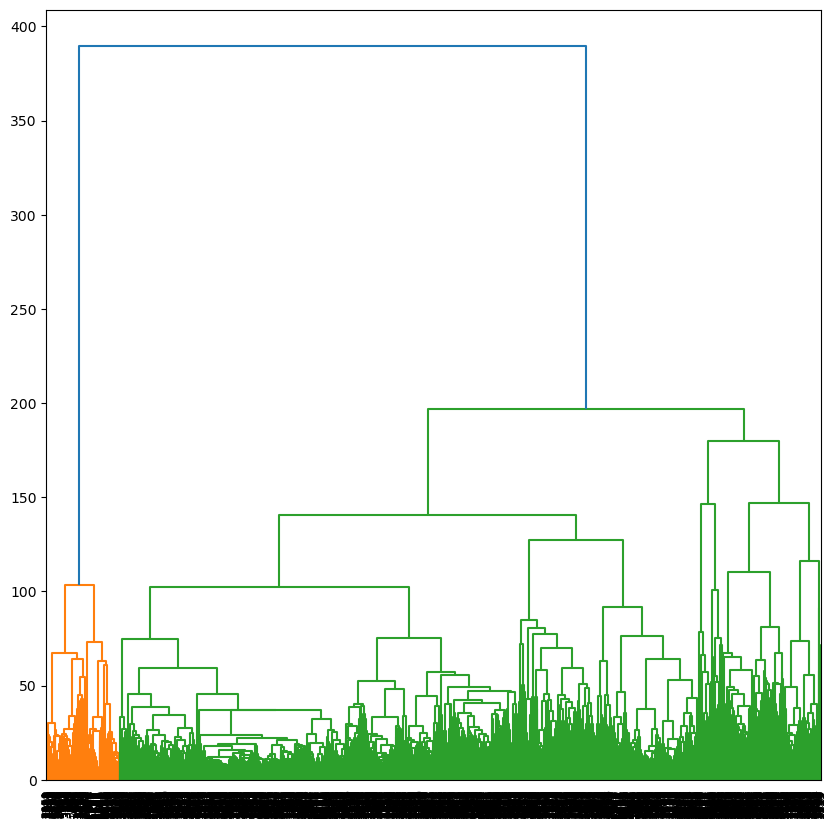

In [10]:
plt.figure(figsize=(10, 10))
plt.clf()
dendrogram(tree_matrix,labels=data_filled.index, orientation='top', leaf_rotation=90, leaf_font_size=8)
plt.show() 

## 2. what are good choices for the number of clusters?

I would consider 5 clusters as the dataset naturally falls into common categories like "Election Coverage," "Foreign Policy", "Social Issues" ,"Economic Issues" and "Technology"

Selecting the number of clusters we need to consider the dataset size, content categories and user experience. Large datasets might require a more clusters for better classification but smaller dataset may suffice with fewer clusters. 

There are other metrics like silhouette score and elbow method to decide the number of clusters. Visual representation also helps us to decide on the number of clusters like dendrogram plot. 

The goal is to create a manageable, intuitive content structure that helps readers easily find articles of interest, balancing granularity and organization to enhance the user experience.

We have used elbow method for the K means model and got the good choice of clusters as 11.

In [16]:
#pip install yellowbrick

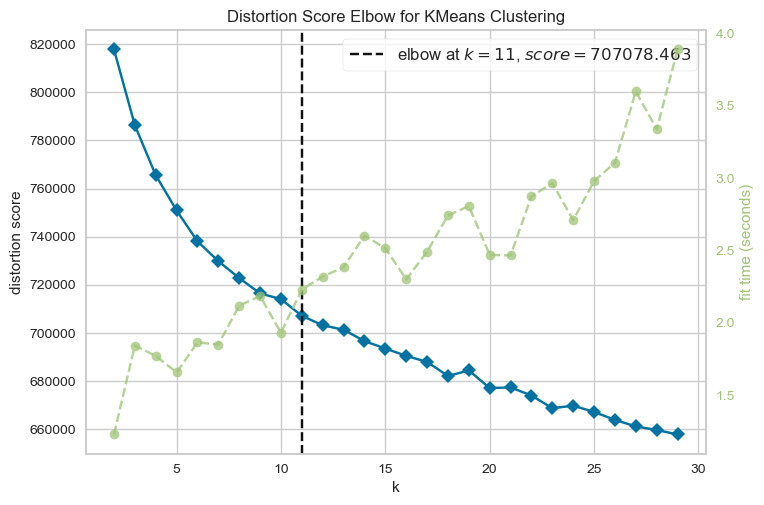

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans() 
# k is range of number of clusters. 
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(data_filled)        
visualizer.show() 

## 3. Cluster analysis with 7 Clusters

In [16]:
from scipy.cluster.hierarchy import cut_tree

# Cut the dendrogram into 7 clusters
clusters = cut_tree(tree_matrix, n_clusters=7)

In [20]:
clusters = np.squeeze(clusters)

# Returns the number of times the element in unique array appears in the original array
unique_clusters, counts = np.unique(clusters, return_counts=True)

cluster_counts = dict(zip(unique_clusters, counts))

for cluster_label, count in cluster_counts.items():
    print(f"Cluster {cluster_label + 1}: {count} observations")

# Print the cluster with the most and fewest observations
print("The cluster with the most observations is cluster", max(cluster_counts, key = cluster_counts.get) + 1)
print("The cluster with the fewest observations is cluster", min(cluster_counts, key = cluster_counts.get) + 1)

Cluster 1: 1761 observations
Cluster 2: 167 observations
Cluster 3: 324 observations
Cluster 4: 803 observations
Cluster 5: 50 observations
Cluster 6: 270 observations
Cluster 7: 55 observations
The cluster with the most observations is cluster 1
The cluster with the fewest observations is cluster 5


The number of observations in cluster 3 are 324.
The highest number of observations are present in cluster 1
the fewest number of observations are present in cluster 5 

In [18]:
cluster_counts

{0: 1761, 1: 167, 2: 324, 3: 803, 4: 50, 5: 270, 6: 55}

## 4. Top Words in cluster 

In [21]:
cluster_df = pd.DataFrame(clusters, columns=["Cluster"])

# Concatenate the cluster assignment with the original data
data_with_clusters = pd.concat([data_filled, cluster_df], axis=1)

# Subset the data to include only data points in Cluster 1
cluster_1_data = data_with_clusters[data_with_clusters["Cluster"] == 0]  

# Calculate the mean frequency of each word in Cluster 1
mean_frequencies_cluster_1 = cluster_1_data.mean(axis=0)

# Sort the words by mean frequency in descending order
sorted_mean_frequencies = mean_frequencies_cluster_1.drop("Cluster").sort_values(ascending=False)

# Output the top 6 words
top_6_words = sorted_mean_frequencies[:6]
print("Top 6 words in Cluster 1:")
print(top_6_words)


Top 6 words in Cluster 1:
bush          1.546281
democrat      0.659852
kerry         0.607609
state         0.542873
presided      0.526973
republican    0.519591
dtype: float64


The first cluster has the highest number of observations and the top most occuring words are bush, democrat, kerry, state, presided and republican. It appars the first cluster is related to political part and the members with a focus on the Bush administration, the Democratic Party, John Kerry, and possibly state governance. 

## 5. Top words in all the clusters

In [24]:
#get top words for all the clusters with mean frequency values
def top_words_with_frequency(df,i,n_words = 6):
    cluster_data = data_with_clusters[data_with_clusters["Cluster"] == i]
    
    mean_frequencies_cluster = cluster_data.mean(axis=0)
    
    sorted_mean_frequencies = mean_frequencies_cluster.drop("Cluster").sort_values(ascending=False)
    
    top_n_words = sorted_mean_frequencies[:n_words]
    
    return top_n_words

In [25]:
for i in range(len(cluster_counts)):
    top_words = top_words_with_frequency(data_with_clusters,i,6)
    print("Top 6 words in Cluster "+str(i+1)+" :")
    print(top_words)
    print("\n")

Top 6 words in Cluster 1 :
bush          1.546281
democrat      0.659852
kerry         0.607609
state         0.542873
presided      0.526973
republican    0.519591
dtype: float64


Top 6 words in Cluster 2 :
kerry       8.101796
bush        7.574850
campaign    1.862275
poll        1.736527
presided    1.616766
democrat    1.389222
dtype: float64


Top 6 words in Cluster 3 :
november     10.376543
poll          4.851852
vote          4.376543
challenge     4.104938
democrat      2.858025
bush          2.858025
dtype: float64


Top 6 words in Cluster 4 :
poll          2.429639
kerry         2.012453
bush          1.922790
democrat      1.823163
republican    1.328767
elect         1.165629
dtype: float64


Top 6 words in Cluster 5 :
democrat      12.38
parties        6.34
state          5.74
republican     5.64
senate         3.30
seat           3.14
dtype: float64


Top 6 words in Cluster 6 :
bush              4.777778
iraq              3.425926
war               2.470370
administrati

Cluster 6 is related to iraq war. As the top 6 words from cluster 6 has iraq and war. 

Based on the provided information about the 2004 Democratic nomination for the President of the United States, it's clear that the cluster that best corresponds to the Democratic Party is Cluster 7. Cluster 7 contains the following prominent words: "dean", "kerry", "democrat", "edward", "candidate", and "gephardt". These words collectively suggest a strong association with the Democratic Party, its candidates, and the nomination process. 

## 6. K Means Clustering

In [26]:
from sklearn.cluster import KMeans

# run k-means clustering, setting the random state to 1000, picking the number of clusters equal to 7.
kmeans = KMeans(n_clusters=7, random_state=1000)

kmeans.fit(data)

kmeans_clusters = kmeans.labels_

C:\Users\mukes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [27]:
clusters = np.squeeze(kmeans_clusters)

unique_clusters, counts = np.unique(kmeans_clusters, return_counts=True)

cluster_counts = dict(zip(unique_clusters, counts))

# subset the data into 7 clusters by defining the "cluster" variable of your kmeans output.
cluster_df = pd.DataFrame(kmeans_clusters, columns=["Cluster"])

# Concatenate the cluster assignment with the original data
data_with_clusters = pd.concat([data, cluster_df], axis=1)

# Create an empty dictionary to store the datasets for each cluster
cluster_datasets = {}

# Iterate through each cluster label 
for cluster_label in range(7):
    # Filter the data to include only data points in the current cluster
    cluster_data = data[kmeans_clusters == cluster_label]
    
    # Store the cluster data in a dictionary with a label
    cluster_datasets[f'Cluster_{cluster_label + 1}'] = cluster_data

for cluster_label, count in cluster_counts.items():
    print(f"Cluster {cluster_label + 1}: {count} observations")
    
# Print the cluster with the most and fewest observations
print("The cluster with the most observations is cluster", max(cluster_counts, key = cluster_counts.get) + 1)
print("The cluster with the fewest observations is cluster", min(cluster_counts, key = cluster_counts.get) + 1)


Cluster 1: 329 observations
Cluster 2: 152 observations
Cluster 3: 363 observations
Cluster 4: 1902 observations
Cluster 5: 44 observations
Cluster 6: 310 observations
Cluster 7: 330 observations
The cluster with the most observations is cluster 4
The cluster with the fewest observations is cluster 5


The number of observations in cluster 3 are 363. The highest number of observations are present in cluster 4 the fewest number of observations are present in cluster 5

In [28]:
# first cluster data
data_with_clusters[data_with_clusters['Cluster']==0]

,abandon,abc,ability,abortion,absolute,abstain,abu,abuse,accept,access,...,year,yesterday,york,youll,young,youre,youve,zogby,zone,Cluster
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,1,0,0,0,0,...,4,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
23,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3364,0,0,0,0,0,1,0,0,0,0,...,1,0,2,0,0,0,0,0,0,0
3376,0,2,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3387,0,0,0,0,0,1,0,0,0,0,...,5,0,0,0,0,0,0,0,0,0
3398,0,0,0,0,0,1,0,0,0,0,...,0,0,3,0,0,0,0,0,0,0


In [29]:
cluster_datasets

{'Cluster_1':       abandon  abc  ability  abortion  absolute  abstain  abu  abuse  accept  \
 2           0    0        0         0         0        1    0      0       0   
 11          0    0        0         0         0        1    0      0       0   
 12          0    0        0         0         0        0    0      0       0   
 23          0    0        0         0         0        1    0      0       0   
 34          0    0        0         0         0        1    0      0       0   
 ...       ...  ...      ...       ...       ...      ...  ...    ...     ...   
 3364        0    0        0         0         0        1    0      0       0   
 3376        0    2        0         0         0        1    0      0       0   
 3387        0    0        0         0         0        1    0      0       0   
 3398        0    0        0         0         0        1    0      0       0   
 3421        0    0        0         0         0        1    0      0       0   
 
       access

## 7. Top Words from each cluster

In [16]:
#get top words for all the clusters with mean frequency values
for i in range(len(cluster_counts)):
    top_words = top_words_with_frequency(data_with_clusters,i,6)
    print("Top 6 words in Cluster "+str(i+1)+" :")
    print(top_words)
    print("\n")

Top 6 words in Cluster 1 :
november     10.370821
poll          4.844985
vote          4.428571
challenge     4.118541
bush          3.030395
democrat      2.869301
dtype: float64


Top 6 words in Cluster 2 :
dean        7.710526
kerry       5.184211
clark       3.046053
edward      2.901316
democrat    2.559211
poll        2.302632
dtype: float64


Top 6 words in Cluster 3 :
democrat      2.933884
republican    2.837466
elect         1.947658
state         1.947658
parties       1.652893
vote          1.592287
dtype: float64


Top 6 words in Cluster 4 :
bush        1.198212
kerry       0.824921
poll        0.720820
democrat    0.608833
general     0.512618
elect       0.473186
dtype: float64


Top 6 words in Cluster 5 :
democrat      14.681818
parties        6.454545
republican     5.886364
state          5.045455
seat           4.113636
senate         4.000000
dtype: float64


Top 6 words in Cluster 6 :
bush        9.032258
kerry       5.661290
poll        2.506452
presided    1.8806

Based on the top words from cluster 7. This cluster best corresponds to Iraq war. 

Based on the provided information and the key Democratic Party leaders during the 2004 U.S. Presidential Election, the K-Means cluster that best corresponds to the Democratic Party is Cluster 2. 

## 8. Comparision of KMeans and Hierarchical Clustering

In [29]:
comparison_df = pd.DataFrame({
    'Hierarchical Cluster': clusters,  
    'K-Means Cluster': kmeans_clusters  
})

# Use crosstab to compare the cluster assignments
cross_tab = pd.crosstab(comparison_df['Hierarchical Cluster'], comparison_df['K-Means Cluster'])


In [30]:
# this gives us the idea on which cluster in K means cluster correspond to Hierarchical cluster
cross_tab

K-Means Cluster,0,1,2,3,4,5,6
Hierarchical Cluster,,,,,,,
0,0,3,91,1487,0,58,122
1,3,4,2,38,0,114,6
2,324,0,0,0,0,0,0
3,1,91,249,359,7,90,6
4,1,0,9,0,35,4,1
5,0,0,12,18,1,44,195
6,0,54,0,0,1,0,0


In [31]:
# Hierarchical Cluster corresponds to K-Means Cluster 3
hierarchical_cluster_for_kmeans_2 = cross_tab[2].idxmax()

# Hierarchical Cluster corresponds to K-Means Cluster 3
hierarchical_cluster_for_kmeans_3 = cross_tab[3].idxmax()

print(f"Hierarchical Cluster that best corresponds to K-Means Cluster 2: {hierarchical_cluster_for_kmeans_2}")
print(f"Hierarchical Cluster that best corresponds to K-Means Cluster 3: {hierarchical_cluster_for_kmeans_3}")

Hierarchical Cluster that best corresponds to K-Means Cluster 2: 3
Hierarchical Cluster that best corresponds to K-Means Cluster 3: 0
